# 1) Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import OneHotEncoder

%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split,cross_val_score 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# 2) Loading the datasets

In [3]:
# Loading the datasets
dataset = pd.read_csv('heart.csv')

In [4]:
dataset.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# **Variable Description**

#### **Age** : Age of the patient

#### **Sex** : Sex of the patient

#### **Exang** : exercise induced angina (1 = yes; 0 = no)

#### **Ca** : number of major vessels (0-3)

#### **Cp** : Chest Pain type chest pain type

* Value 1: typical angina
* Value 2: atypical angina
* Value 3: non-anginal pain
* Value 4: asymptomatic

#### **trtbps** : resting blood pressure (in mm Hg)

#### **Chol** : cholestoral in mg/dl fetched via BMI sensor

#### **Fbs** : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

#### **Rest_ecg** : resting electrocardiographic results

* Value 0: normal
* Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
* Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

#### **Thalach** : maximum heart rate achieved

#### **Target** : 0= less chance of heart attack 1= more chance of heart attack

# 3)Exploratory Data Analysis

# >Univariate Analysis

<AxesSubplot:title={'center':'Age v/s Number of heart attacks'}, xlabel='AGE', ylabel='Frequency'>

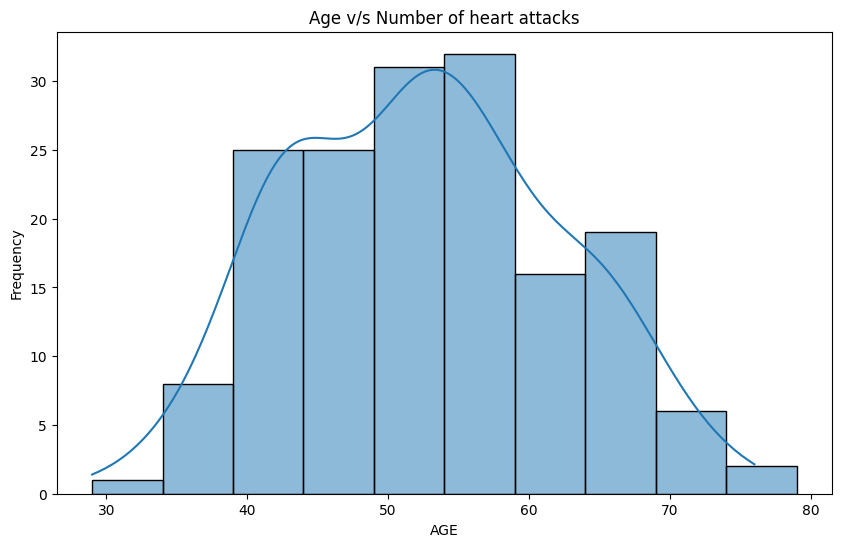

In [7]:
fig = plt.figure(figsize=(10,6))
X = dataset['age']*dataset['target']
X= X[X != 0]
plt.xlabel('AGE')
plt.ylabel('Frequency')
plt.title("Age v/s Number of heart attacks")
sns.histplot(data=X,binwidth=5,kde=True)
# We observe that people in the age of 40-60 got more heart attacks compared to others

<AxesSubplot:xlabel='sex', ylabel='Count'>

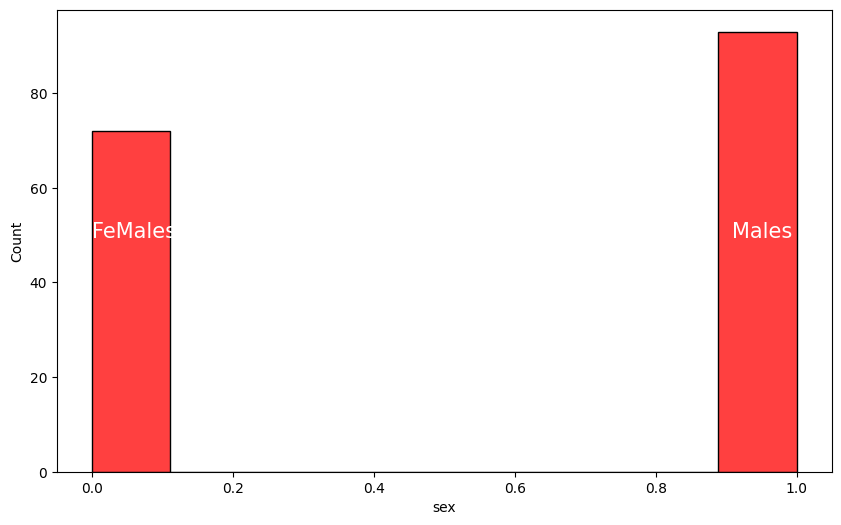

In [8]:
X = dataset['sex']
X = X[dataset['target'] !=0]
fig = plt.figure(figsize=(10,6))
plt.figtext( .16,.5, "FeMales",color='white',fontsize=15)
plt.figtext(.8, .5, "Males",color='white',fontsize=15)
sns.histplot(data=X,color='r')

<AxesSubplot:title={'center':'Chest Pain type v/s # heart attacks'}, xlabel='Count', ylabel='Chest Pain Type'>

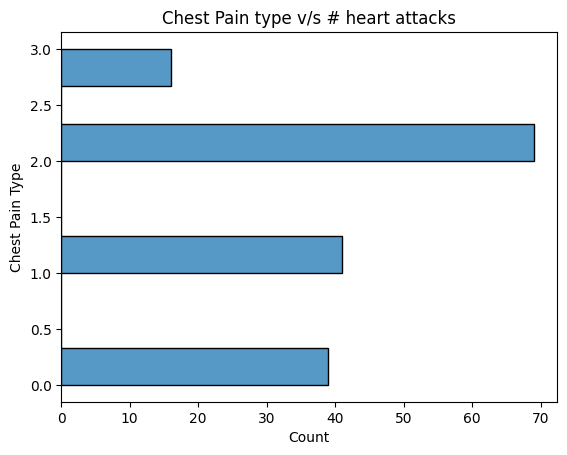

In [9]:
X = dataset['cp']
X = X[dataset['target'] !=0]
plt.title("Chest Pain type v/s # heart attacks")
plt.ylabel("Chest Pain Type")
sns.histplot(y=X)
# We observe that people who got chest pain of type 3(value 2) are most likely to suffer heart attack

Text(0, 0.5, 'Count')

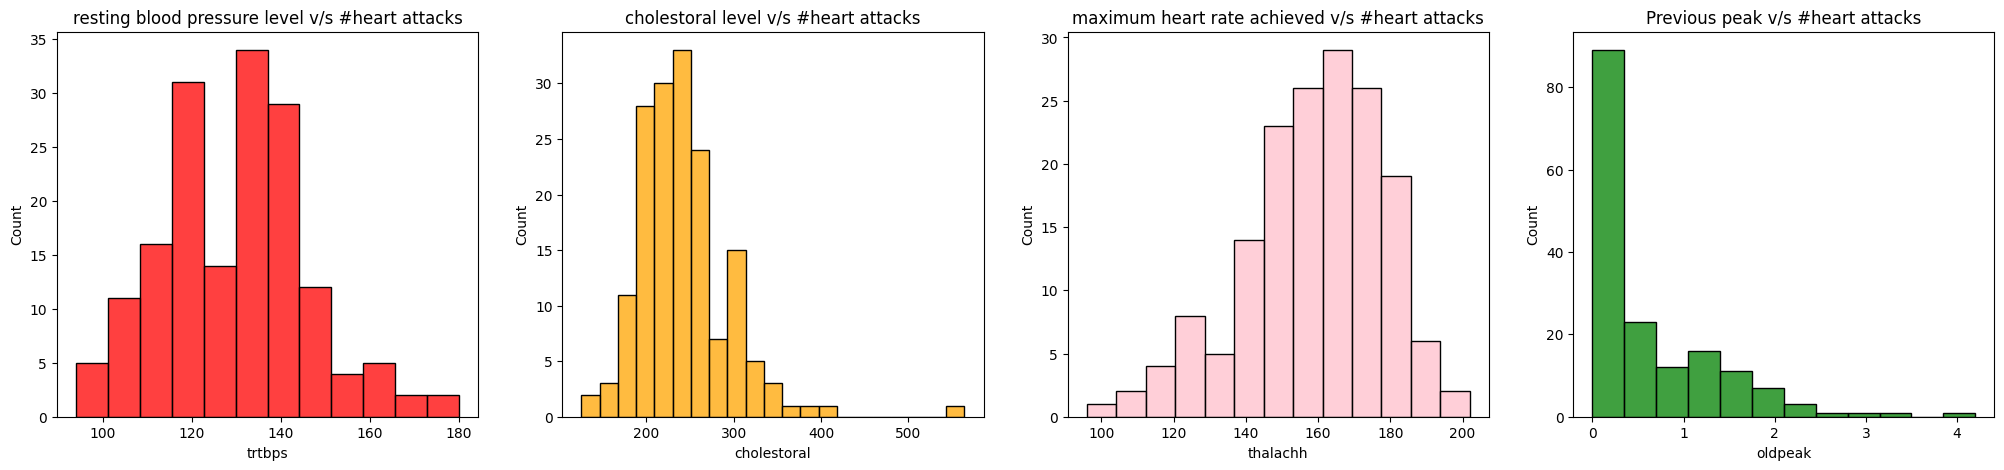

In [10]:
# fig = plt.figure(figsize=(10,6))
fig, axs = plt.subplots(ncols=4,figsize=(25,5))
X = dataset['trestbps']
X = X[dataset['target'] !=0]
sns.histplot(x=X,ax=axs[0],color='r')
axs[0].set_title('resting blood pressure level v/s #heart attacks')
axs[0].set_xlabel('trtbps')
axs[0].set_ylabel('Count')

X = dataset['chol']
X = X[dataset['target'] !=0]
sns.histplot(x=X,ax=axs[1],color='orange')
axs[1].set_title('cholestoral level v/s #heart attacks')
axs[1].set_xlabel('cholestoral')
axs[1].set_ylabel('Count')


X = dataset['thalach']
X = X[dataset['target'] !=0]
sns.histplot(x=X,ax=axs[2],color='pink')
axs[2].set_title('maximum heart rate achieved v/s #heart attacks')
axs[2].set_xlabel('thalachh')
axs[2].set_ylabel('Count')


X = dataset['oldpeak']
X = X[dataset['target'] !=0]
sns.histplot(x=X,ax=axs[3],color='green')
axs[3].set_title('Previous peak v/s #heart attacks')
axs[3].set_xlabel('oldpeak')
axs[3].set_ylabel('Count')

Text(0.5, 1.0, 'Thal rate')

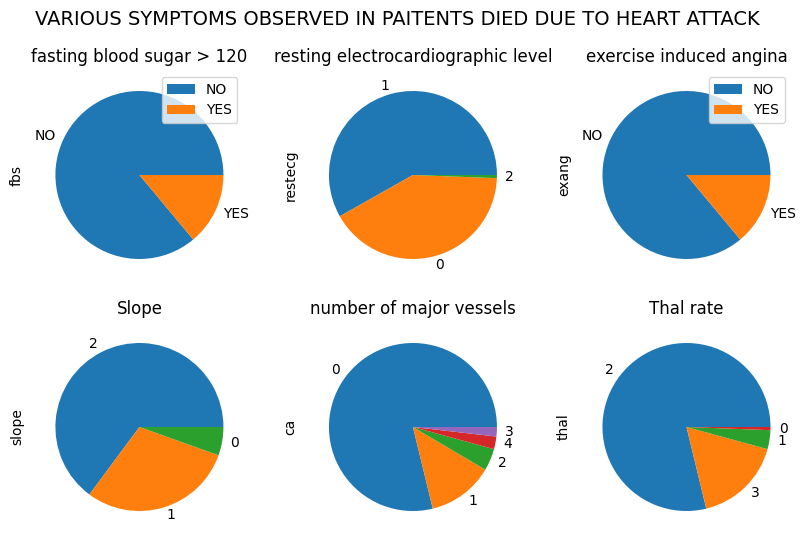

In [11]:
plt.figure(figsize=(10,6))
plt.suptitle("VARIOUS SYMPTOMS OBSERVED IN PAITENTS DIED DUE TO HEART ATTACK ", fontsize=14)
plt.subplot(2, 3, 1)
X = dataset['fbs']
X = X[dataset['target'] !=0]
# grid(True)
X.value_counts().plot.pie(labels=['NO','YES'])
plt.title("fasting blood sugar > 120")
plt.legend()
# grid(True)

plt.subplot(2, 3, 2)
X = dataset['restecg']
X = X[dataset['target'] !=0]
X.value_counts().plot.pie()
plt.title("resting electrocardiographic level")

plt.subplot(2, 3, 3)
X = dataset['exang']
X = X[dataset['target'] !=0]
X.value_counts().plot.pie(labels=['NO','YES'])
plt.title("exercise induced angina")
plt.legend()

plt.subplot(2, 3, 4)
X = dataset['slope']
X = X[dataset['target'] !=0]
X.value_counts().plot.pie()
plt.title("Slope")


plt.subplot(2, 3, 5)
X = dataset['ca']
X = X[dataset['target'] !=0]
X.value_counts().plot.pie()
plt.title("number of major vessels")

plt.subplot(2, 3, 6)
X = dataset['thal']
X = X[dataset['target'] !=0]
X.value_counts().plot.pie()
plt.title("Thal rate")


In [12]:
df = dataset.loc[:,['age','trestbps','chol','thalach','oldpeak','target']]

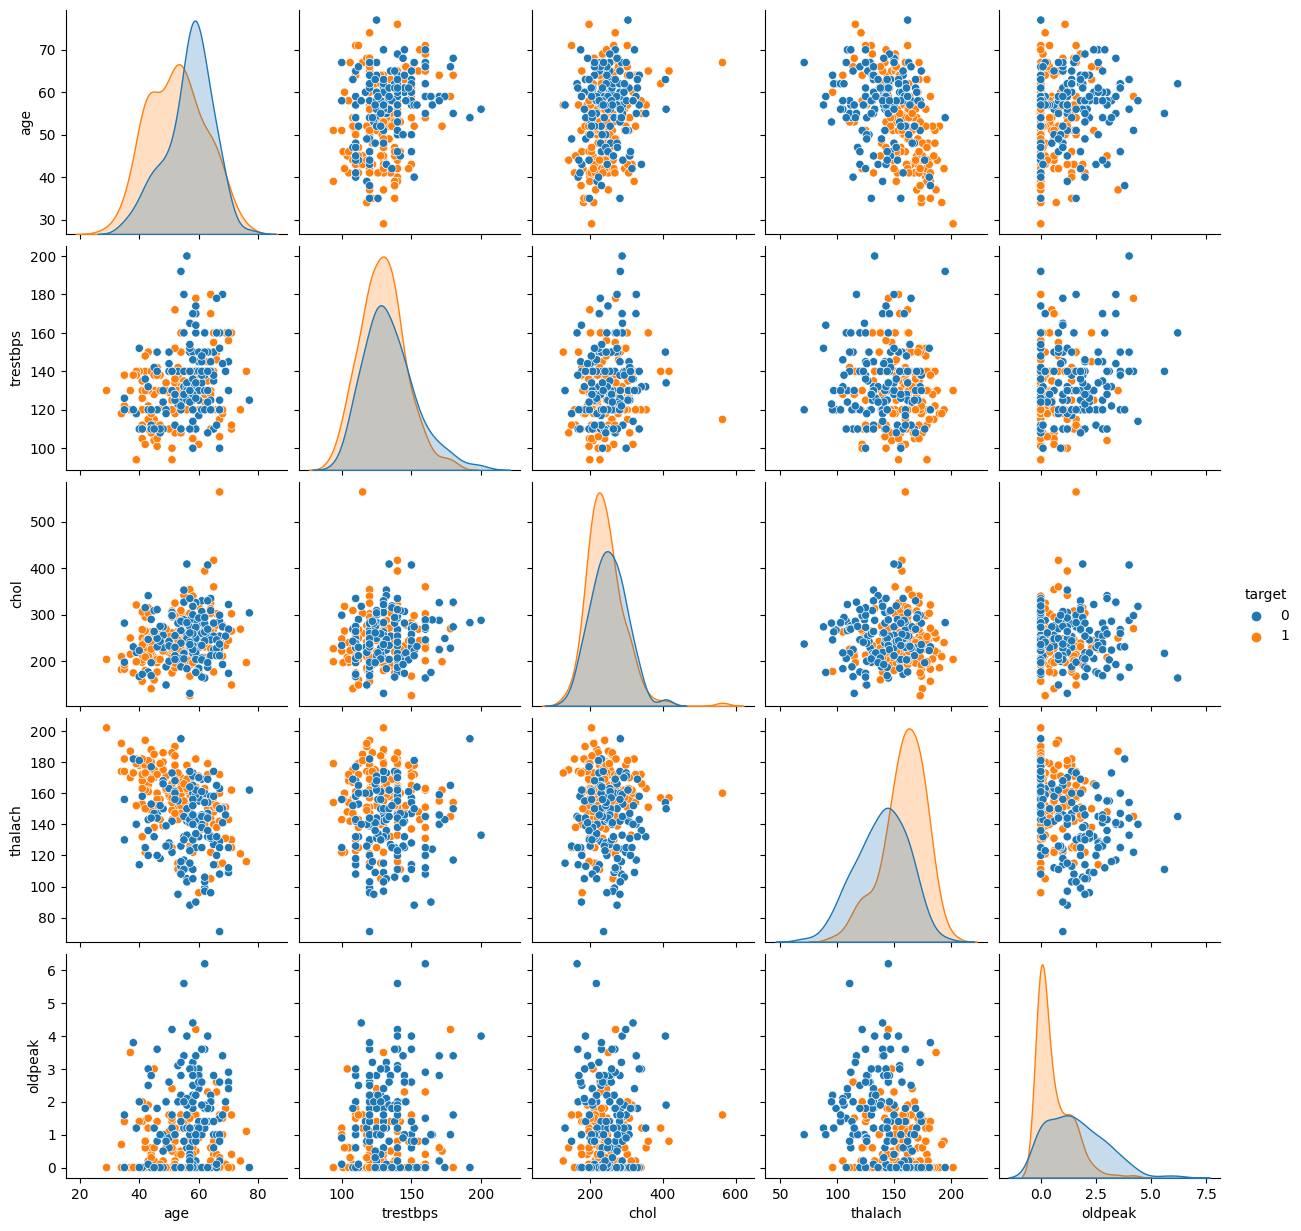

In [13]:
sns.pairplot(df,hue='target')

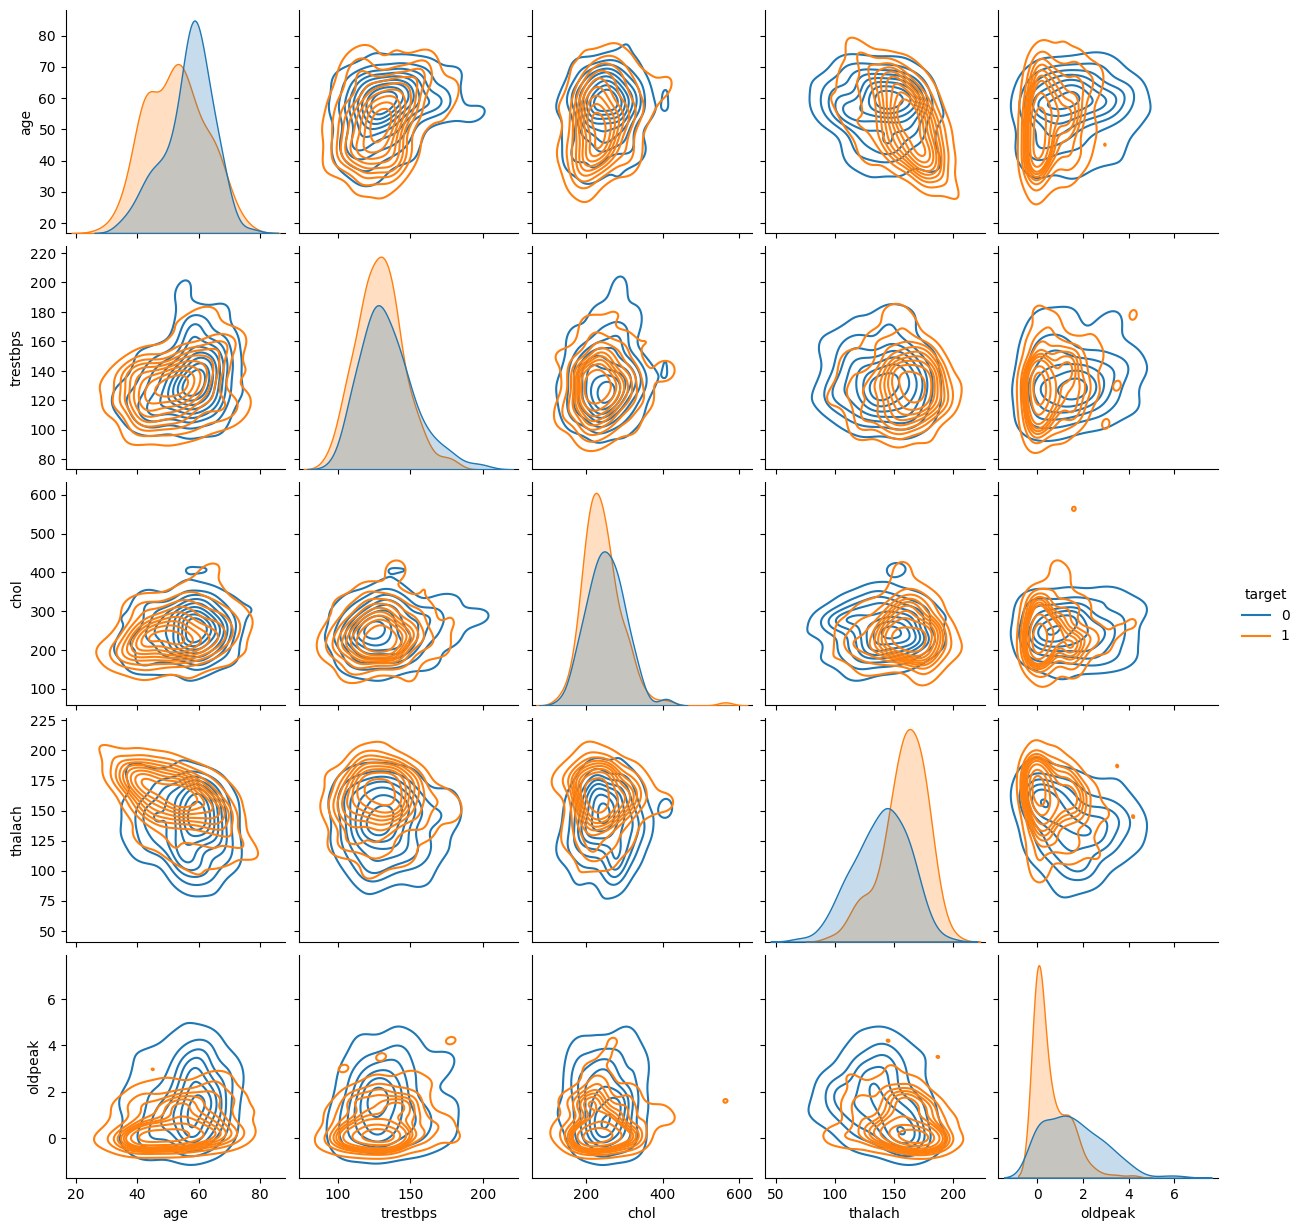

In [16]:
sns.pairplot(df,hue='target',kind='kde')

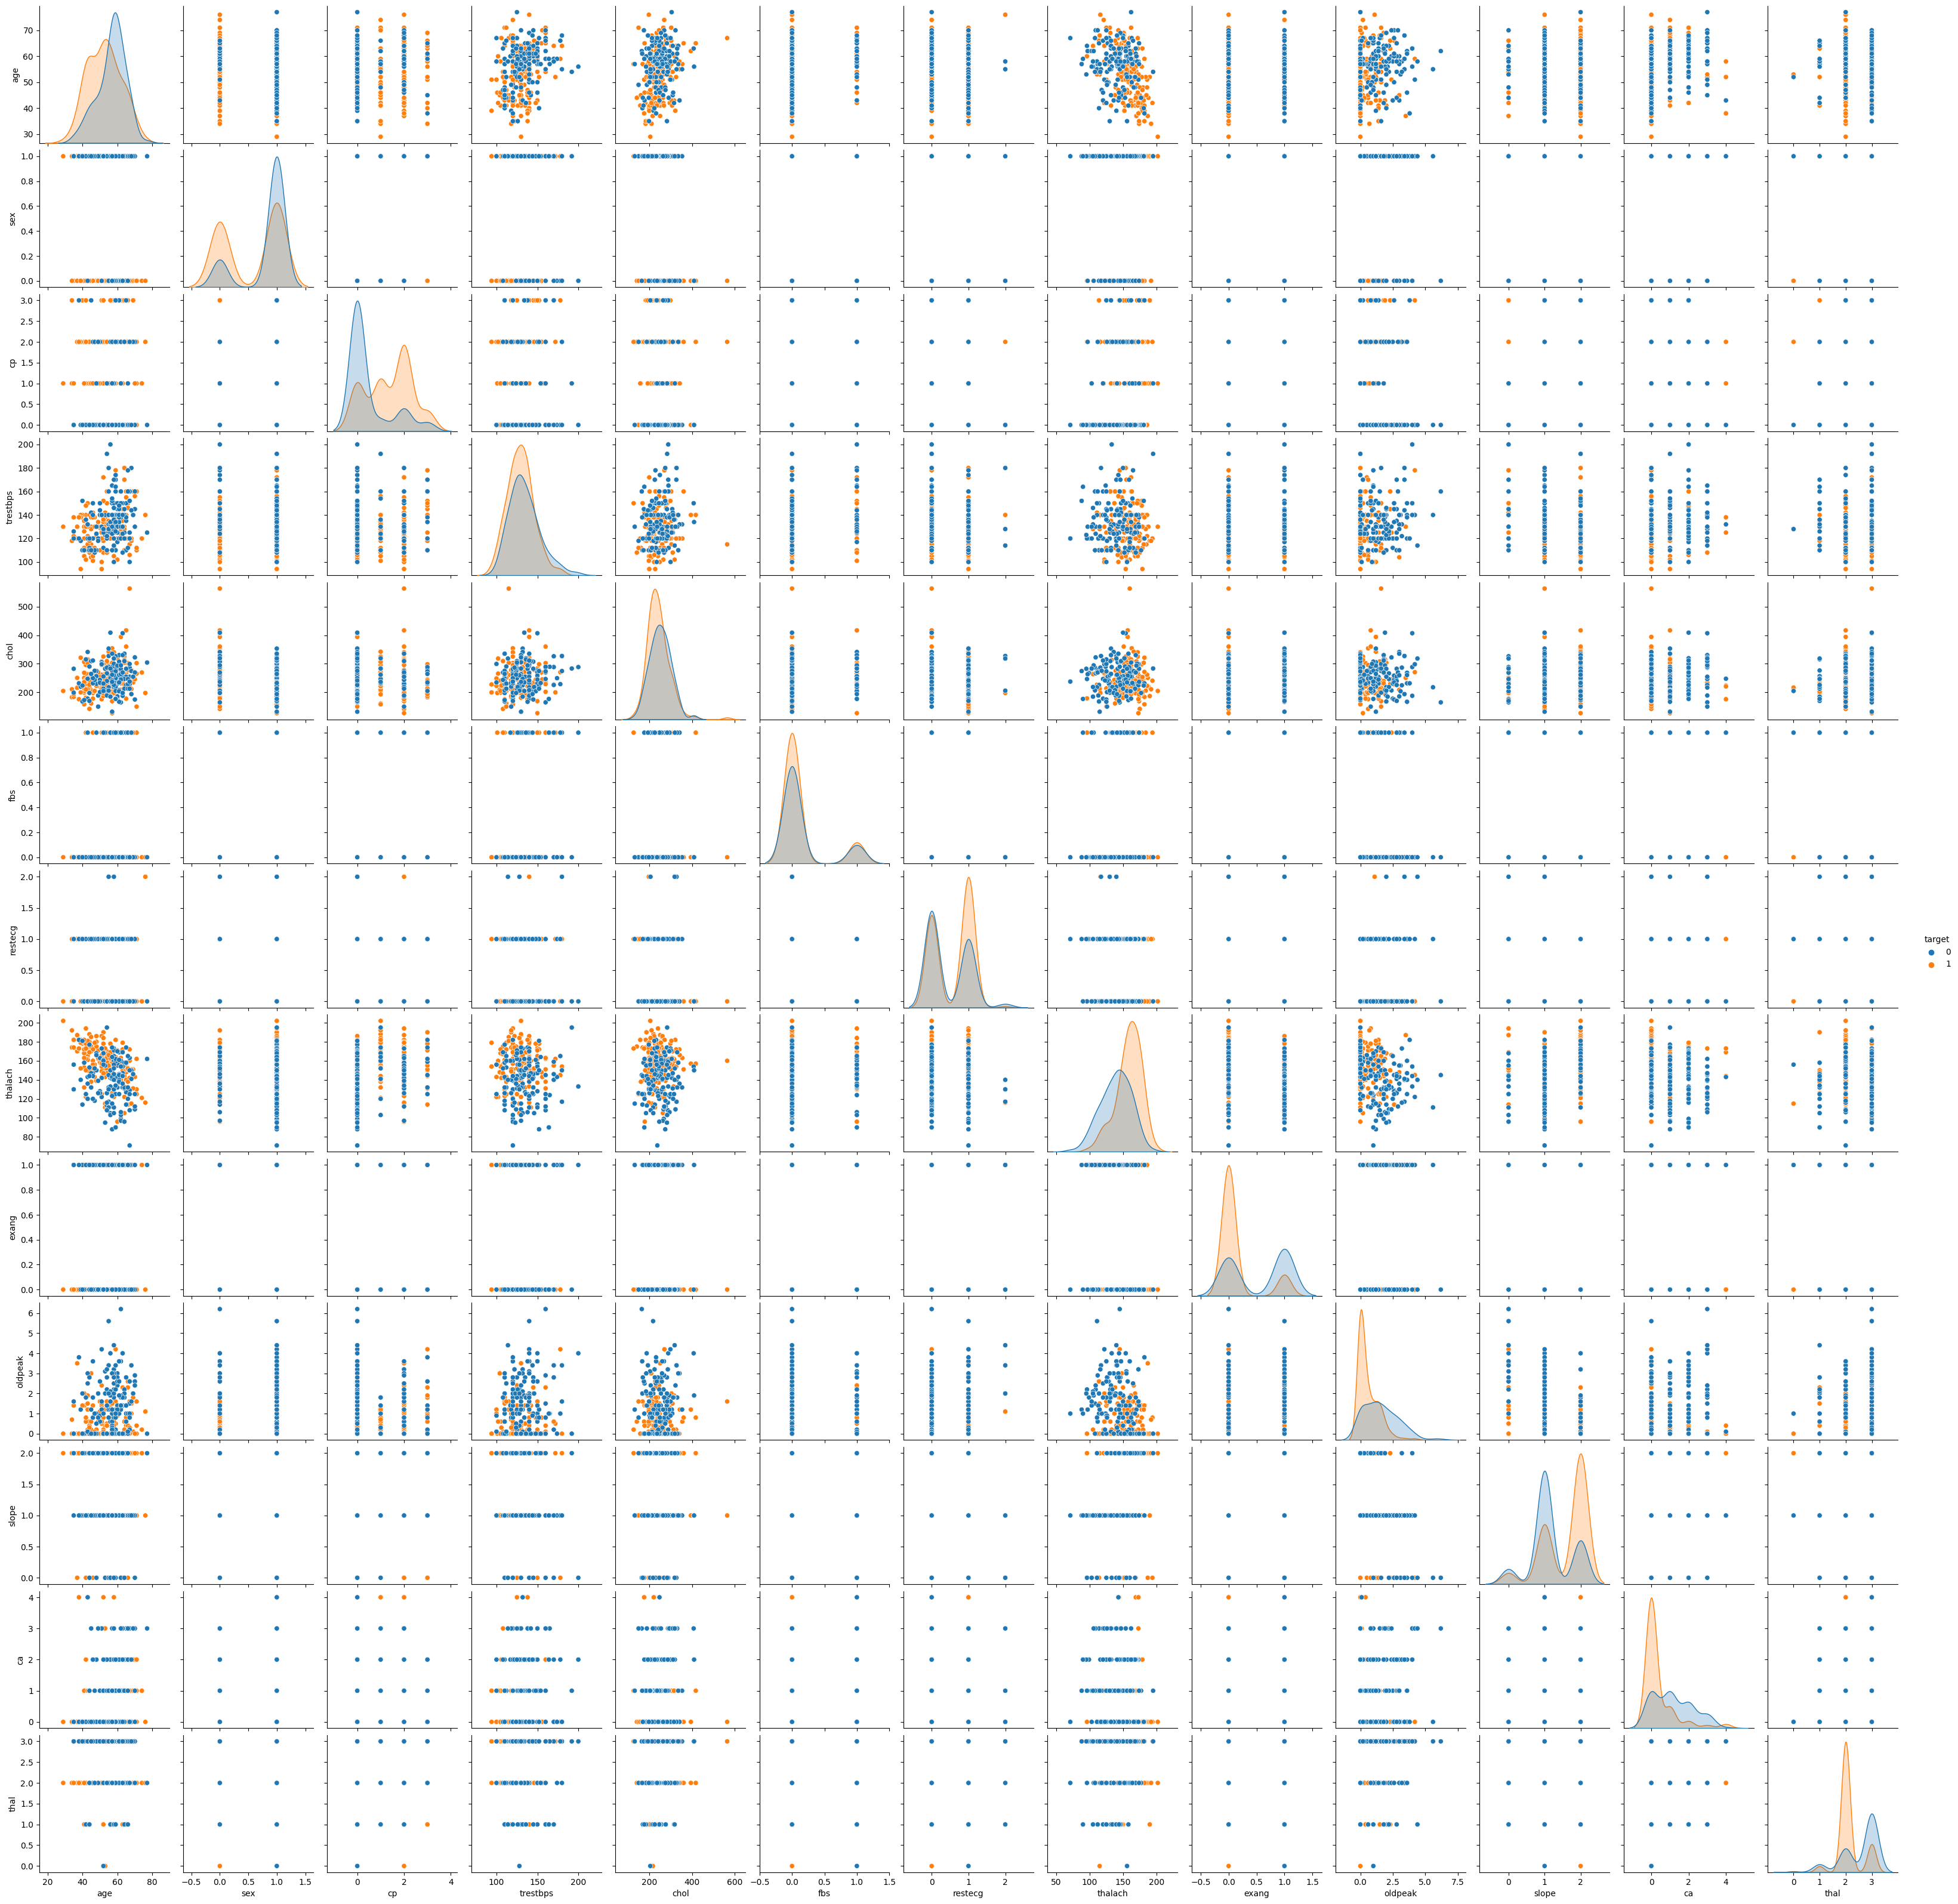

In [14]:
sns.pairplot(dataset,hue='target')

<AxesSubplot:>

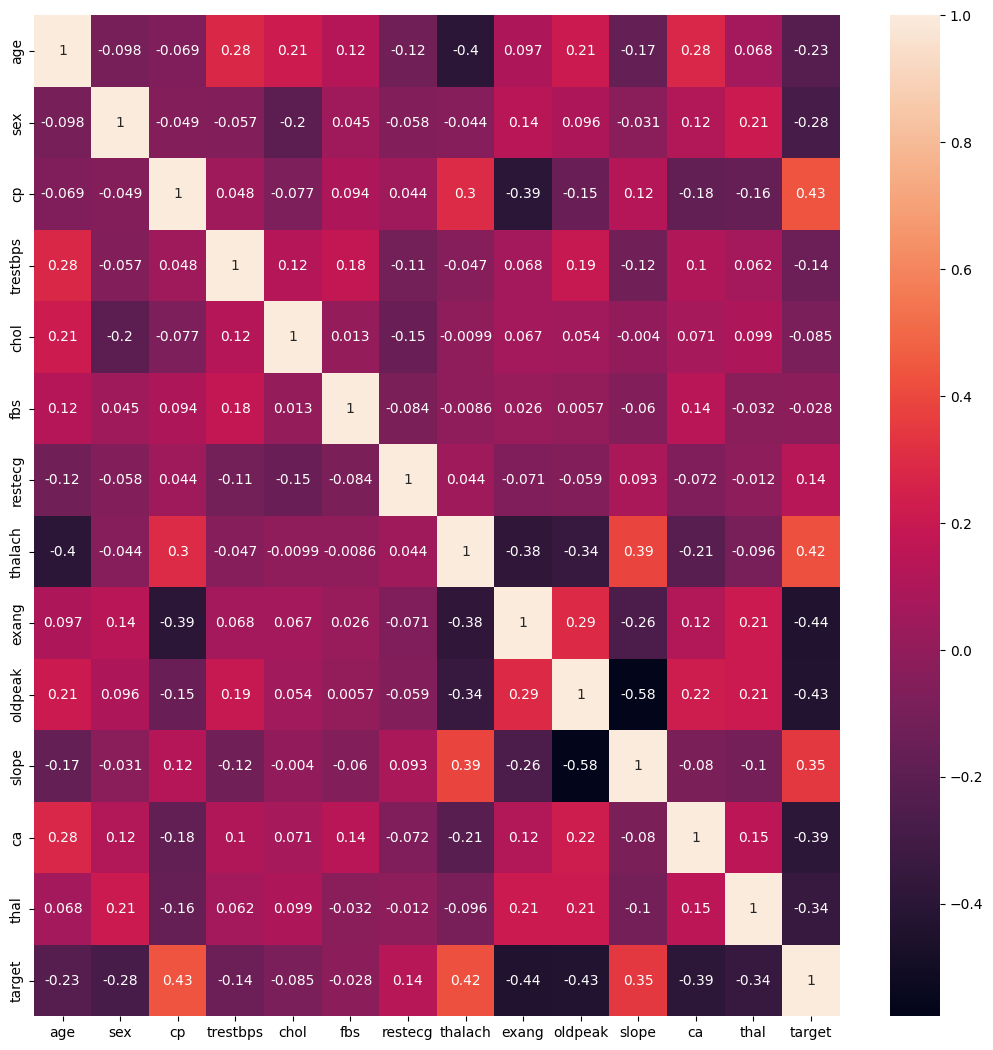

In [15]:
plt.figure(figsize=(13,13))
sns.heatmap(dataset.corr(),color='red',annot=True)

# Observations

1)Following symptoms are more likely to appear in paitents who suffered with heart attack

*  Chestpain type 3(Non anginal chest pains)
*  number of major vessels 0
*  Higher Thall rate
*  People with exercise induced angina
*  People with higher old peak value

2)Correlations

*   OldPeak and slp show strongly negetive Correlation 
*   Slp,thalachh,cp show strongly positive Correltion

In [17]:
dataset.dropna(axis = 0 , subset = ['target'] , inplace = True)
y = dataset.target
dataset.drop(['target'] , axis = 1 ,inplace = True)

In [18]:
#train test split -- Train = 80%  -- Test = 20%
from sklearn.model_selection import train_test_split
train_x , valid_x , train_y ,valid_y = train_test_split(dataset , y ,train_size = 0.8 , test_size = 0.2 , random_state = 0) 


In [19]:
train_x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
74,43,0,2,122,213,0,1,165,0,0.2,1,0,2
153,66,0,2,146,278,0,0,152,0,0.0,1,1,2
64,58,1,2,140,211,1,0,165,0,0.0,2,0,2
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2
287,57,1,1,154,232,0,0,164,0,0.0,2,1,2


In [20]:
categorical_cols = [each for each in train_x.columns if train_x[each].dtype == "object" and
           train_x[each].nunique() < 10 ]

numerical_cols = [each for each in train_x.columns if train_x[each].dtype in ['int64' , 'float64']]

In [21]:
numerical_cols

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

In [22]:
my_cols = categorical_cols + numerical_cols
X_train = train_x[my_cols].copy()
X_valid = valid_x[my_cols].copy()


In [23]:

numerical_transformer = SimpleImputer(strategy = 'constant')

categorical_transformer = Pipeline(steps = [
    ('imputer' , SimpleImputer(strategy = 'most_frequent')),
    ('onehot' , OneHotEncoder(handle_unknown = 'ignore'))
]
)

preprocessor = ColumnTransformer(
    transformers = [
        ('num' ,numerical_transformer ,numerical_cols),
        ('cat',categorical_transformer,categorical_cols)
    ]
)



# A) Random Forest
<hr>
<table>
  <tr>
    <th>Train Accuracy</th>
    <th>Test Accuracy</th>
    <th>Mean(10-fold CV score)</th>
    <th>Standard Deviation(10-fold CV Score)</th>
    <th>F1 Score 0</th>
     <th>F1 Score 1</th>
  </tr>
  <tr>
    <td>100.00%</td>
    <td>83.61%</td>
    <td>80.59%</td>
    <td>4.61%</td>
    <td>0.82</td>
    <td>0.85</td>
  </tr>
</table>



In [24]:
model = RandomForestClassifier(n_estimators = 100 , random_state = 1)

clf = Pipeline(steps = [
    ('preprocessor' , preprocessor),
    ('model' , model)
])

clf.fit(X_train , train_y)
pred = clf.predict(X_valid)

error = mean_absolute_error(pred , valid_y)


In [25]:
print(X_train.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')


In [26]:
print(X_train.head())
print(train_y.head(10))

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
74    43    0   2       122   213    0        1      165      0      0.2   
153   66    0   2       146   278    0        0      152      0      0.0   
64    58    1   2       140   211    1        0      165      0      0.0   
296   63    0   0       124   197    0        1      136      1      0.0   
287   57    1   1       154   232    0        0      164      0      0.0   

     slope  ca  thal  
74       1   0     2  
153      1   1     2  
64       2   0     2  
296      1   0     2  
287      2   1     2  
74     1
153    1
64     1
296    0
287    0
286    0
236    0
126    1
73     1
20     1
Name: target, dtype: int64


In [27]:
import numpy as np
def predict_entry(age , sex , cp , trestbps , chol , fbs ,restecg , thalach , 
                 exang , oldpeak , slope , ca , thal ) :
    

    dic = {}
    dic['age'] = age
    dic['sex'] = sex
    dic['cp'] = cp
    dic['trestbps'] = trestbps
    dic['chol'] = chol
    dic['fbs'] = fbs
    dic['restecg'] = restecg
    dic['thalach'] = thalach
    dic['exang'] = exang
    dic['oldpeak'] = oldpeak
    dic['slope'] = slope
    dic['ca'] = ca
    dic['thal'] = thal
    data = pd.DataFrame(dic , index = [0])
    print(clf.predict(data))
    
prediction = predict_entry(63,0,0,124,197,0 ,1 ,136 ,1  ,0.0 ,1 ,0 ,2)	

[0]


**Confusion Matrix**

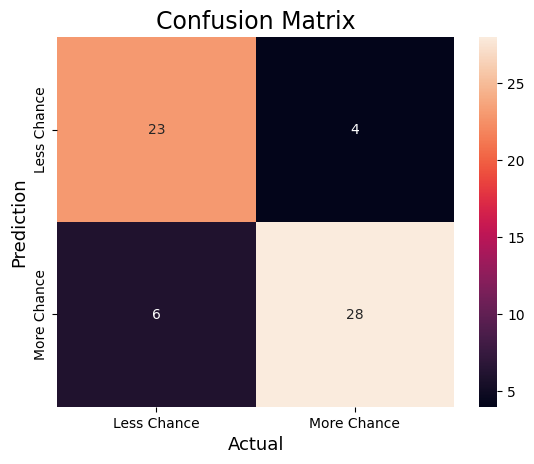

In [28]:
cm = confusion_matrix(valid_y, pred)
 
#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Less Chance', 'More Chance'],
            yticklabels=['Less Chance', 'More Chance'])
plt.ylabel('Prediction', fontsize=13)
plt.xlabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17)
plt.show()

**Classification Report**

In [29]:
print(classification_report(valid_y,pred))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82        27
           1       0.88      0.82      0.85        34

    accuracy                           0.84        61
   macro avg       0.83      0.84      0.83        61
weighted avg       0.84      0.84      0.84        61



**Accuracy**

In [30]:
print("Train Accuracy : {:.2f}%".format(accuracy_score(train_y,clf.predict(X_train))*100))
print("Test Accuracy  : {:.2f}%".format(accuracy_score(valid_y,pred)*100))

Train Accuracy : 100.00%
Test Accuracy  : 83.61%


**K-fold Cross Validation**

In [31]:
accuracies_RF = cross_val_score(estimator = clf, X = X_train, y = train_y, cv = 3)
print("Accuracy: {:.2f} %".format(accuracies_RF.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies_RF.std()*100))

Accuracy: 80.59 %
Standard Deviation: 4.61 %


**Saving Random Forest Pickle file and column json file**

In [32]:
import pickle
with open('heart_detail_RF.pickle' , 'wb') as f :
    pickle.dump(clf , f)

In [33]:
import json
columns = {
    'data_columns' :[col.lower() for col in dataset.columns]
}

with open('column.json' , 'w') as f :
    f.write(json.dumps(columns))

# B) Decision Tree
<hr>
<table>
  <tr>
    <th>Train Accuracy</th>
    <th>Test Accuracy</th>
    <th>Mean(10-fold CV score)</th>
    <th>Standard Deviation(10-fold CV Score)</th>
    <th>F1 Score 0</th>
     <th>F1 Score 1</th>
  </tr>
  <tr>
    <td>100.00%</td>
    <td>80.33%</td>
    <td>73.59%</td>
    <td>5.44%</td>
    <td>0.79</td>
    <td>0.82</td>
  </tr>
</table>

In [34]:
dt_model = DecisionTreeClassifier()

dt_clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', dt_model)
])


dt_clf.fit(X_train, train_y)
dt_pred = dt_clf.predict(X_valid)

In [35]:
import numpy as np
def predict_entry(age , sex , cp , trestbps , chol , fbs ,restecg , thalach , 
                 exang , oldpeak , slope , ca , thal ) :
    

    dic = {}
    dic['age'] = age
    dic['sex'] = sex
    dic['cp'] = cp
    dic['trestbps'] = trestbps
    dic['chol'] = chol
    dic['fbs'] = fbs
    dic['restecg'] = restecg
    dic['thalach'] = thalach
    dic['exang'] = exang
    dic['oldpeak'] = oldpeak
    dic['slope'] = slope
    dic['ca'] = ca
    dic['thal'] = thal
    data = pd.DataFrame(dic , index = [0])
    print(dt_clf.predict(data))
    
prediction = predict_entry(63,0,0,124,197,0 ,1 ,136 ,1  ,0.0 ,1 ,0 ,2)	

[0]


**Confusion Matrix**

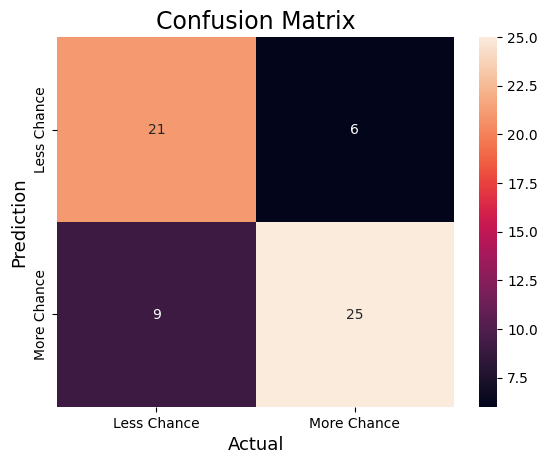

In [36]:
dt_cm = confusion_matrix(valid_y, dt_pred)

#Plot the confusion matrix.
sns.heatmap(dt_cm,
            annot=True,
            fmt='g',
            xticklabels=['Less Chance', 'More Chance'],
            yticklabels=['Less Chance', 'More Chance'])
plt.ylabel('Prediction', fontsize=13)
plt.xlabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17)
plt.show()

**Classification Report**

In [37]:
dt_classification_report = classification_report(valid_y, dt_pred)
print("Decision Tree Classification Report:\n", dt_classification_report)

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.78      0.74        27
           1       0.81      0.74      0.77        34

    accuracy                           0.75        61
   macro avg       0.75      0.76      0.75        61
weighted avg       0.76      0.75      0.75        61



**Accuracy**

In [38]:
print("Train Accuracy : {:.2f}%".format(accuracy_score(train_y,dt_clf.predict(X_train))*100))
print("Test Accuracy  : {:.2f}%".format(accuracy_score(valid_y,dt_pred)*100))

Train Accuracy : 100.00%
Test Accuracy  : 75.41%


**K-fold Cross Validation**

In [39]:
accuracies_DT = cross_val_score(estimator = dt_clf, X = X_train, y = train_y, cv = 3)
print("Accuracy: {:.2f} %".format(accuracies_DT.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies_DT.std()*100))

Accuracy: 68.62 %
Standard Deviation: 3.66 %


**Saving Decision Tree Pickle file**

In [40]:
import pickle
with open('heart_detail_DT.pickle' , 'wb') as f :
    pickle.dump(dt_clf , f)

# C) SVM
<hr>
<table>
  <tr>
    <th>Train Accuracy</th>
    <th>Test Accuracy</th>
    <th>Mean(10-fold CV score)</th>
    <th>Standard Deviation(10-fold CV Score)</th>
    <th>F1 Score 0</th>
     <th>F1 Score 1</th>
  </tr>
  <tr>
    <td>89.26%</td>
    <td>86.89%</td>
    <td>81.41%</td>
    <td>2.64%</td>
    <td>0.84</td>
    <td>0.89</td>
  </tr>
</table>

In [41]:
model_svm = SVC()

clf_svm = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler()),  # Adding StandardScaler for SVM
    ('model', model_svm)
])


clf_svm.fit(X_train, train_y)
pred_svm = clf_svm.predict(X_valid)

error_svm = mean_absolute_error(pred_svm, valid_y)

**Confusion Matrix**

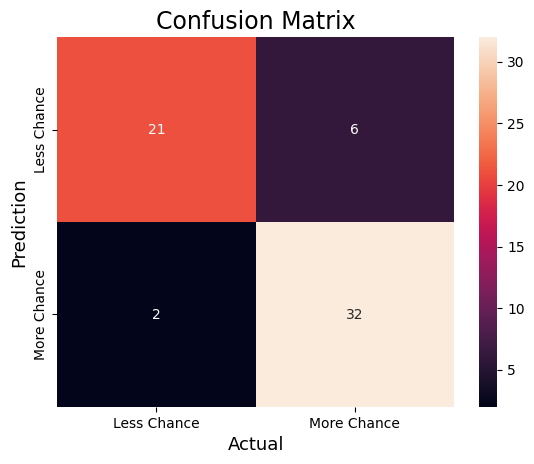

In [42]:
svm_cm = confusion_matrix(valid_y, pred_svm)

#Plot the confusion matrix.
sns.heatmap(svm_cm,
            annot=True,
            fmt='g',
            xticklabels=['Less Chance', 'More Chance'],
            yticklabels=['Less Chance', 'More Chance'])
plt.ylabel('Prediction', fontsize=13)
plt.xlabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17)
plt.show()

**Classification Report**

In [43]:
svm_classification_report = classification_report(valid_y, pred_svm)
print("Decision Tree Classification Report:\n", svm_classification_report)

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.78      0.84        27
           1       0.84      0.94      0.89        34

    accuracy                           0.87        61
   macro avg       0.88      0.86      0.86        61
weighted avg       0.87      0.87      0.87        61



**Accuracy**

In [44]:
print("Train Accuracy : {:.2f}%".format(accuracy_score(train_y,clf_svm.predict(X_train))*100))
print("Test Accuracy  : {:.2f}%".format(accuracy_score(valid_y,pred_svm)*100))

Train Accuracy : 89.26%
Test Accuracy  : 86.89%


**K-fold Cross Validation**

In [45]:
accuracies_svm = cross_val_score(estimator = clf_svm, X = X_train, y = train_y, cv = 3)
print("Accuracy: {:.2f} %".format(accuracies_svm.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies_svm.std()*100))

Accuracy: 81.41 %
Standard Deviation: 2.64 %


**Saving Decision Tree Pickle file**

In [46]:
import pickle
with open('heart_detail_SVC.pickle' , 'wb') as f :
    pickle.dump(clf_svm , f)

## D) K-NN
<hr>
<table>
  <tr>
    <th>Train Accuracy</th>
    <th>Test Accuracy</th>
    <th>Mean(10-fold CV score)</th>
    <th>Standard Deviation(10-fold CV Score)</th>
    <th>F1 Score 0</th>
     <th>F1 Score 1</th>
  </tr>
  <tr>
    <td>86.78%</td>
    <td>81.97%</td>
    <td>78.95%</td>
    <td>5.54%</td>
    <td>0.79</td>
    <td>0.84%</td>
  </tr>
</table>

In [47]:
model_knn = KNeighborsClassifier()

clf_knn = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler()),  # Adding StandardScaler for KNN
    ('model', model_knn)
])

clf_knn.fit(X_train, train_y)
pred_knn = clf_knn.predict(X_valid)

error_knn = mean_absolute_error(pred_knn, valid_y)

**Confusion Matrix**

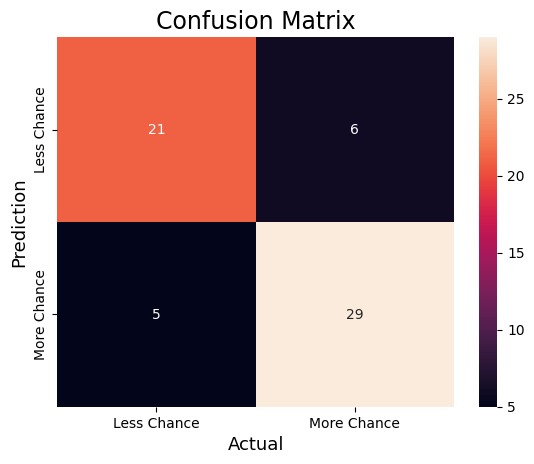

In [48]:
knn_cm = confusion_matrix(valid_y, pred_knn)

#Plot the confusion matrix.
sns.heatmap(knn_cm,
            annot=True,
            fmt='g',
            xticklabels=['Less Chance', 'More Chance'],
            yticklabels=['Less Chance', 'More Chance'])
plt.ylabel('Prediction', fontsize=13)
plt.xlabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17)
plt.show()

**Classification Report**

In [49]:
knn_classification_report = classification_report(valid_y, pred_knn)
print("KNN Classification Report:\n", knn_classification_report)

KNN Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.78      0.79        27
           1       0.83      0.85      0.84        34

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



**Accuracy**

In [50]:
print("Train Accuracy: {:.2f}%".format(accuracy_score(train_y, clf_knn.predict(X_train))*100))
print("Test Accuracy: {:.2f}%".format(accuracy_score(valid_y, pred_knn)*100))

Train Accuracy: 86.78%
Test Accuracy: 81.97%


**K-fold Cross Validation**

In [51]:
accuracies_KNN = cross_val_score(estimator=clf_knn, X=X_train, y=train_y, cv=3)
print("Accuracy: {:.2f}%".format(accuracies_KNN.mean()*100))
print("Standard Deviation: {:.2f}%".format(accuracies_KNN.std()*100))

Accuracy: 78.95%
Standard Deviation: 5.54%


**Saving KNN Pickle file**

In [52]:
import pickle
with open('heart_detail_KNN.pickle', 'wb') as f:
    pickle.dump(clf_knn, f)

# E) Logistic Regression
<hr>
<table>
  <tr>
    <th>Train Accuracy</th>
    <th>Test Accuracy</th>
    <th>Mean(10-fold CV score)</th>
    <th>Standard Deviation(10-fold CV Score)</th>
    <th>F1 Score 0</th>
     <th>F1 Score 1</th>
  </tr>
  <tr>
    <td>84.30%</td>
    <td>85.25%</td>
    <td>80.58%</td>
    <td>0.65%</td>
    <td>0.82</td>
    <td>0.87</td>
  </tr>
</table>

In [53]:
model_logreg = LogisticRegression()

clf_logreg = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler()),  # Adding StandardScaler for Logistic Regression
    ('model', model_logreg)
])

clf_logreg.fit(X_train, train_y)
pred_logreg = clf_logreg.predict(X_valid)

error_logreg = mean_absolute_error(pred_logreg, valid_y)

**Confusion Matrix**

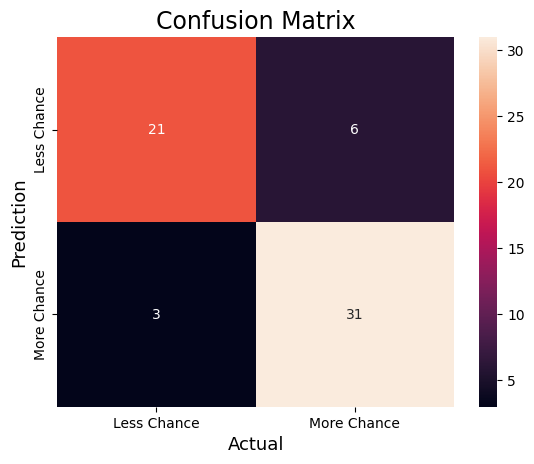

In [54]:
logreg_cm = confusion_matrix(valid_y, pred_logreg)

#Plot the confusion matrix.
sns.heatmap(logreg_cm,
            annot=True,
            fmt='g',
            xticklabels=['Less Chance', 'More Chance'],
            yticklabels=['Less Chance', 'More Chance'])
plt.ylabel('Prediction', fontsize=13)
plt.xlabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17)
plt.show()


**Classification Report**

In [55]:
logreg_classification_report = classification_report(valid_y, pred_logreg)
print("Logistic Regression Classification Report:\n", logreg_classification_report)

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.78      0.82        27
           1       0.84      0.91      0.87        34

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.85      0.85      0.85        61



**Accuracy**

In [56]:
print("Train Accuracy: {:.2f}%".format(accuracy_score(train_y, clf_logreg.predict(X_train))*100))
print("Test Accuracy: {:.2f}%".format(accuracy_score(valid_y, pred_logreg)*100))

Train Accuracy: 84.30%
Test Accuracy: 85.25%


**K-fold Cross Validation**

In [57]:
accuracies_logreg = cross_val_score(estimator=clf_logreg, X=X_train, y=train_y, cv=3)
print("Accuracy: {:.2f}%".format(accuracies_logreg.mean()*100))
print("Standard Deviation: {:.2f}%".format(accuracies_logreg.std()*100))

Accuracy: 80.58%
Standard Deviation: 0.65%


**Saving Logistic Regression Pickle file**

In [58]:
import pickle
with open('heart_detail_LogisticRegression.pickle', 'wb') as f:
    pickle.dump(clf_logreg, f)

# Results And Observations

##Results
<table>
<tr>
    <th>MODEL</th>
    <th>Train Accuracy</th>
    <th>Test Accuracy</th>
    <th>Mean(10-fold CV score)</th>
    <th>Standard Deviation(10-fold CV Score)</th>
    <th>F1 Score 0</th>
     <th>F1 Score 1</th>
</tr>
    
<tr>
    <th scope="row" > Random Forest</th>
    <td>100.00%</td>
    <td>83.61%</td>
    <td>80.59%</td>
    <td>4.61%</td>
    <td>0.82</td>
    <td>0.85</td>
</tr>
    
<tr>
    <th scope="row" > Decision Tree </th>
    <td>100.00%</td>
    <td>80.33%</td>
    <td>73.59%</td>
    <td>5.44%</td>
    <td>0.79</td>
    <td>0.82</td>
</tr>
    
<tr>
    <th scope="row" > SVM </th>
    <td>89.26%</td>
    <td>86.89%</td>
    <td>81.41%</td>
    <td>2.64%</td>
    <td>0.84</td>
    <td>0.89</td>
</tr>
   
<tr>
    <th scope="row" > KNN </th>
    <td>86.78%</td>
    <td>81.97%</td>
    <td>78.95%</td>
    <td>5.54%</td>
    <td>0.79</td>
    <td>0.84%</td>
</tr>
    
    
<tr>
     <th scope="row">Logistic Regression</th>
    <td>84.30%</td>
    <td>85.25%</td>
    <td>80.58%</td>
    <td>0.65%</td>
    <td>0.82</td>
    <td>0.87</td>
</tr>


</table>
